# Exercise 2-2: Write your own code for the Mortality Notebook

In [1]:
import pandas as pd

## Get the long and wide DataFrames

In [2]:
mortality_data = pd.read_pickle('mortality_data.pkl')

In [3]:
mortality_wide = pd.read_pickle('mortality_wide.pkl')

## Work with the long DataFrame

In [4]:
mortality_data.head()

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5


In [19]:
mortality_data.columns = mortality_data.columns.str.replace('Death Rate','Deaths/100K')
mortality_data.rename(columns={"Age Group":"AgeGroup"}, inplace=True)

mortality_data.head()

,Year,AgeGroup,Deaths/100K
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5


In [37]:
print(mortality_data)
# mortality_data['MeanCentered'] = mortality_data['Deaths/100k'] - mortality_data['Deaths/100k'].mean()
mortality_data['MeanCentered'] = mortality_data['Deaths/100k'] - mortality_data['Deaths/100k'].mean()

mortality_data[['Year','MeanCentered']].head()

     Year     AgeGroup  Deaths/100K
0    1900    1-4 Years       1983.8
1    1901    1-4 Years       1695.0
2    1902    1-4 Years       1655.7
3    1903    1-4 Years       1542.1
4    1904    1-4 Years       1591.5
..    ...          ...          ...
471  2014  15-19 Years         45.5
472  2015  15-19 Years         48.3
473  2016  15-19 Years         51.2
474  2017  15-19 Years         51.5
475  2018  15-19 Years         49.2

[476 rows x 3 columns]


KeyError: 'Deaths/100k'

In [21]:
mortality_data.query('Year >= 1915 and Year <= 1920').tail(6)

,Year,AgeGroup,Deaths/100K
372,1915,15-19 Years,330.9
373,1916,15-19 Years,355.8
374,1917,15-19 Years,380.3
375,1918,15-19 Years,777.4
376,1919,15-19 Years,438.5
377,1920,15-19 Years,402.9


In [22]:
mortality_data.query('AgeGroup == "01-04 Years"')[['Year','Deaths/100K']].head()

,Year,Deaths/100K


In [23]:
with pd.option_context(
    'display.max_rows', 6,
    'display.max_columns', None):
    display(mortality_data.sort_values('Deaths/100K', ascending=False))

,Year,AgeGroup,Deaths/100K
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
...,...,...,...
233,2014,5-9 Years,11.5
229,2010,5-9 Years,11.5
231,2012,5-9 Years,11.4


In [24]:
mortality_data['Deaths/100K'].median()

89.5

In [25]:
mortality_data.groupby('Year')[['Deaths/100K']].sum()

,Deaths/100K
Year,
1900,3233.0
1901,2850.6
1902,2733.0
1903,2659.1
1904,2793.1
...,...
2014,95.0
2015,99.5
2016,103.3


## Work with the wide DataFrame

In [26]:
mortality_wide.head()

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
0,1900,0.019838,0.004661,0.002983,0.004848
1,1901,0.016950,0.004276,0.002736,0.004544
2,1902,0.016557,0.004033,0.002525,0.004215
3,1903,0.015421,0.004147,0.002682,0.004341
4,1904,0.015915,0.004250,0.003052,0.004714


In [27]:
mortality_wide.index

RangeIndex(start=0, stop=119, step=1)

In [28]:
mortality_wide.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,119.0,1959.000000,34.496377,1900.000000,1929.500000,1959.000000,1988.500000,2018.000000
01-04 Years,119.0,0.003832,0.005005,0.000240,0.000507,0.001091,0.005773,0.019838
05-09 Years,119.0,0.001173,0.001275,0.000114,0.000240,0.000484,0.001989,0.004661
10-14 Years,119.0,0.000938,0.000884,0.000139,0.000272,0.000446,0.001589,0.003751
15-19 Years,119.0,0.001774,0.001384,0.000448,0.000855,0.001069,0.002837,0.007774


In [29]:
mortality_wide[['Year', '01-04 Years']]

,Year,01-04 Years
0,1900,0.019838
1,1901,0.016950
2,1902,0.016557
3,1903,0.015421
4,1904,0.015915
...,...,...
114,2014,0.000240
115,2015,0.000249
116,2016,0.000253
117,2017,0.000243


In [30]:
mortality_wide.query('Year >= 1915 and Year <= 1920').head(6)

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
15,1915,0.009242,0.002606,0.001967,0.003309
16,1916,0.011115,0.002824,0.002051,0.003558
17,1917,0.010660,0.002907,0.002189,0.003803
18,1918,0.015735,0.004479,0.003751,0.007774
19,1919,0.009280,0.003000,0.002364,0.004385
20,1920,0.009872,0.002952,0.002299,0.004029


In [31]:
mortality_wide.query('Year >= 1915 and Year <= 1920')[['Year','01-04 Years']].head(6)

,Year,01-04 Years
15,1915,0.009242
16,1916,0.011115
17,1917,0.010660
18,1918,0.015735
19,1919,0.009280
20,1920,0.009872


In [32]:
mortality_data.groupby('Year').agg(['mean','median','sum'])

Deaths/100K                
            mean  median     sum
Year                            
1900     808.250  475.45  3233.0
1901     712.650  441.00  2850.6
1902     683.250  412.40  2733.0
1903     664.775  424.40  2659.1
1904     698.275  448.20  2793.1
...          ...     ...     ...
2014      23.750   19.00    95.0
2015      24.875   19.75    99.5
2016      25.825   19.95   103.3
2017      25.725   19.90   102.9
2018      24.900   19.45    99.6

[119 rows x 3 columns]

In [33]:
mortality_wide['TotalDeaths'] = \
    mortality_wide['01-04 Years'] + \
    mortality_wide['05-09 Years'] + \
    mortality_wide['10-14 Years'] + \
    mortality_wide['15-19 Years']
mortality_wide

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years,TotalDeaths
0,1900,0.019838,0.004661,0.002983,0.004848,0.032330
1,1901,0.016950,0.004276,0.002736,0.004544,0.028506
2,1902,0.016557,0.004033,0.002525,0.004215,0.027330
3,1903,0.015421,0.004147,0.002682,0.004341,0.026591
4,1904,0.015915,0.004250,0.003052,0.004714,0.027931
...,...,...,...,...,...,...
114,2014,0.000240,0.000115,0.000140,0.000455,0.000950
115,2015,0.000249,0.000117,0.000146,0.000483,0.000995
116,2016,0.000253,0.000122,0.000146,0.000512,0.001033
117,2017,0.000243,0.000116,0.000155,0.000515,0.001029


<AxesSubplot:xlabel='Year'>

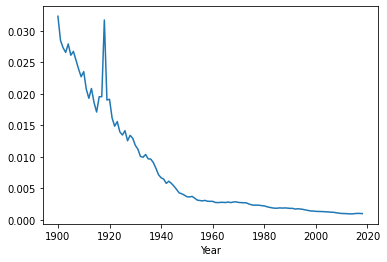

In [34]:
mortality_wide.groupby('Year').TotalDeaths.sum().plot()